In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

import env
import acquire
np.random.seed(123)

In [2]:
from acquire import get_iris_data

In [3]:
df = acquire.get_iris_data()

In [4]:
df

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...,...
145,3,146,6.7,3.0,5.2,2.3,virginica
146,3,147,6.3,2.5,5.0,1.9,virginica
147,3,148,6.5,3.0,5.2,2.0,virginica
148,3,149,6.2,3.4,5.4,2.3,virginica


features to use for clustering: sepal_width, petal_width

In [42]:
X = df[['sepal_width', 'petal_width']]

In [47]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1,
       3, 1, 3, 1, 3, 1, 5, 5, 5, 2, 5, 5, 5, 2, 5, 5, 2, 5, 2, 5, 5, 5,
       5, 2, 2, 2, 0, 5, 2, 5, 5, 5, 5, 0, 5, 2, 2, 2, 5, 5, 5, 5, 5, 2,
       5, 2, 2, 5, 2, 2, 5, 5, 5, 5, 2, 5, 4, 0, 0, 0, 4, 0, 0, 0, 0, 4,
       4, 0, 0, 0, 4, 4, 0, 4, 0, 2, 4, 0, 0, 0, 4, 0, 0, 0, 0, 5, 0, 4,
       0, 5, 5, 4, 4, 0, 0, 4, 4, 4, 0, 4, 4, 4, 0, 0, 4, 0], dtype=int32)

In [48]:
df['cluster'] = kmeans.predict(X)

In [49]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,sepal_width,petal_width
0,2.844828,1.910345
1,3.257576,0.236364
2,2.394737,1.126316
3,3.850000,0.262500
4,3.252632,2.284211
5,2.932353,1.402941


Text(0.5, 1.0, 'Visualizing Cluster Centers')

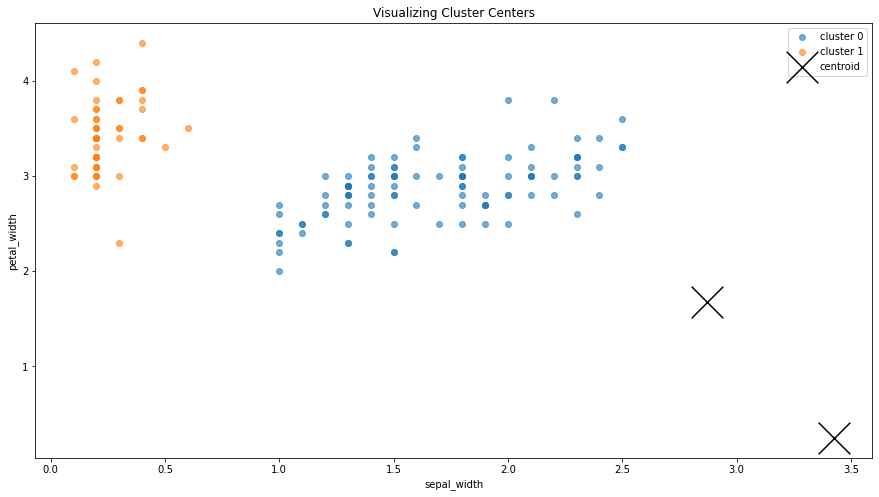

In [46]:
plt.figure(figsize=(15, 8))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.petal_width, subset.sepal_width, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_width', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.title('Visualizing Cluster Centers')

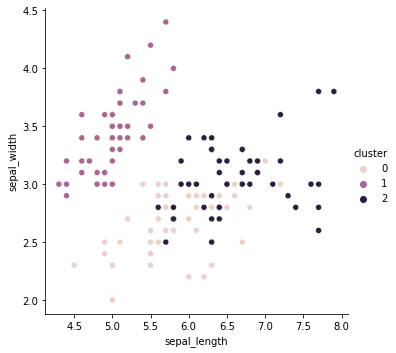

In [26]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

sns.relplot(data=df, x='sepal_length', y='sepal_width', hue='cluster')



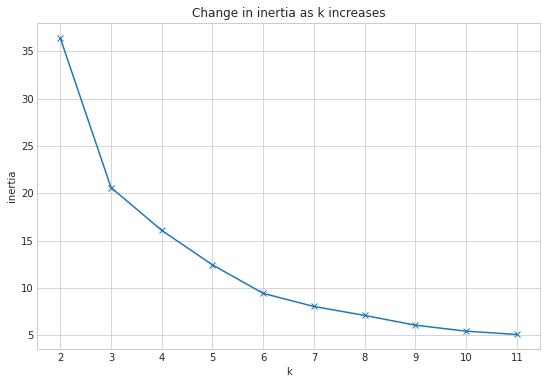

In [27]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [28]:
X = df[['sepal_width', 'petal_width', 'petal_length']]

In [29]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

kmeans.predict(X)

df['cluster'] = kmeans.predict(X)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,sepal_width,petal_width,petal_length
0,2.500000,1.135294,3.735294
1,3.428000,0.246000,1.462000
2,3.176190,2.171429,6.047619
3,2.903333,1.403333,4.473333
4,2.840625,1.893750,5.184375


Text(0.5, 1.0, 'Visualizing Cluster Centers')

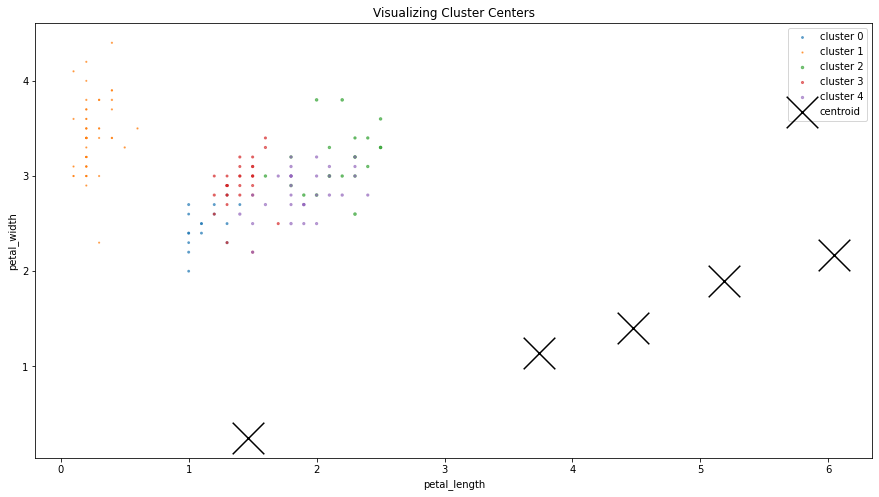

In [35]:
plt.figure(figsize=(15, 8))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.petal_width, subset.sepal_width, subset.petal_length, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_width', x='petal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.title('Visualizing Cluster Centers')

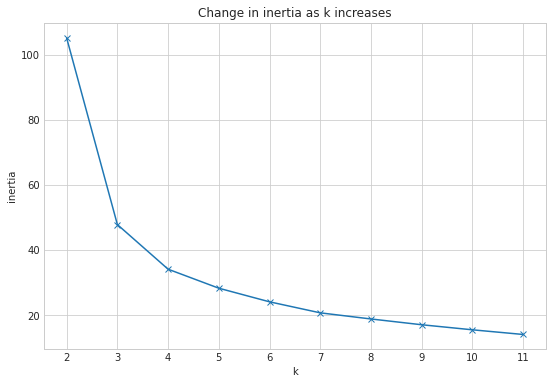

In [31]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [50]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/mall_customers'

In [51]:
sql = """
        SELECT *
        FROM customers;

        """
df = pd.read_sql(sql, url)

In [52]:
df

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [53]:
X = df[['annual_income', 'spending_score']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

kmeans.predict(X)

df['cluster'] = kmeans.predict(X)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,annual_income,spending_score
0,86.538462,82.128205
1,48.260000,56.480000
2,26.304348,20.913043
3,87.000000,18.631579


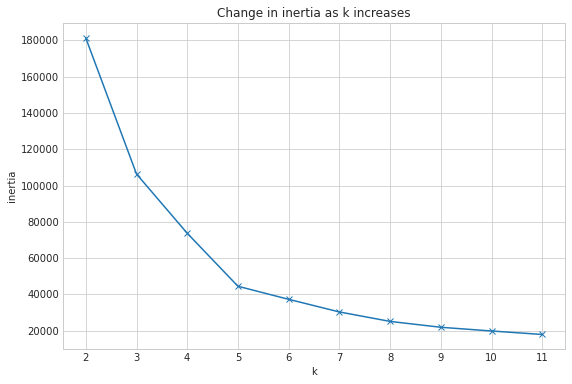

In [54]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

Text(0.5, 1.0, 'Visualizing Cluster Centers')

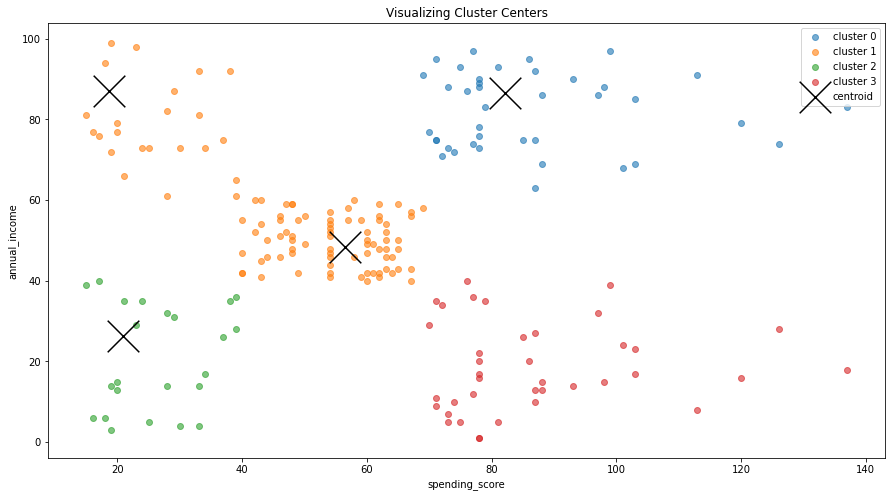

In [55]:
plt.figure(figsize=(15, 8))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.annual_income, subset.spending_score, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='annual_income', x='spending_score', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.title('Visualizing Cluster Centers')

In [58]:
import sklearn.preprocessing

In [60]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(df[['annual_income', 'spending_score']])
# inserts the 4 selected features into the scaler

df[['scaledincome', 'scaledscore']] = scaler.transform(df[['annual_income', 'spending_score']])

In [61]:
X = df[['scaledincome', 'scaledscore']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

kmeans.predict(X)

df['cluster'] = kmeans.predict(X)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,scaledincome,scaledscore
0,0.586381,0.827839
1,0.092659,0.203194
2,0.590164,0.179914
3,0.272623,0.566122


Text(0.5, 1.0, 'Visualizing Cluster Centers')

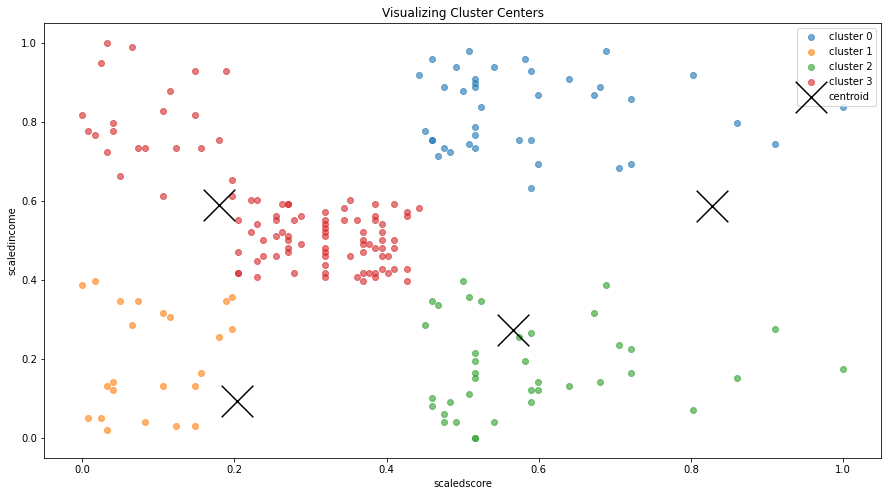

In [62]:
plt.figure(figsize=(15, 8))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.scaledincome, subset.scaledscore, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='scaledincome', x='scaledscore', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.title('Visualizing Cluster Centers')

Note: Scaled data is necessary when for Kmeans